In [1]:
import pandas as pd

In [2]:
tab1 = pd.read_csv('bin_364.csv')
tab1 = tab1.drop('Unnamed: 0', axis=1)

In [3]:
tab2 = pd.read_csv('bin_465.csv')
tab2 = tab2.drop('Unnamed: 0', axis=1)

In [4]:
tab3 = pd.read_csv('bin_585.csv')
tab3 = tab3.drop('Unnamed: 0', axis=1)

In [5]:
tab4 = pd.read_csv('bin_7106.csv')
tab4 = tab4.drop('Unnamed: 0', axis=1)

In [6]:
concat = pd.concat([tab1,tab2,tab3,tab4], axis = 0)

In [7]:
concat

,A,"I(X,A)",a,a_count,"I(X,Y|A=a)",Y,"I(X,A|Y=y)","I(X,Y)",bins
0,gender,0.375301,Female,14845.0,1.149657,0,0.336049,1.041023,"3,6,4,30"
1,gender,0.375301,Female,14845.0,1.149657,1,0.354018,1.041023,"3,6,4,30"
2,gender,0.375301,Female,14845.0,1.149657,2,0.388836,1.041023,"3,6,4,30"
3,gender,0.375301,Female,14845.0,1.149657,3,0.387403,1.041023,"3,6,4,30"
4,gender,0.375301,Female,14845.0,1.149657,4,0.419424,1.041023,"3,6,4,30"
...,...,...,...,...,...,...,...,...,...
375,marital-status,0.879902,Widowed,1278.0,1.754227,15,0.505611,1.098168,"7,10,6,20"
376,marital-status,0.879902,Widowed,1278.0,1.754227,16,0.500634,1.098168,"7,10,6,20"
377,marital-status,0.879902,Widowed,1278.0,1.754227,17,0.377618,1.098168,"7,10,6,20"
378,marital-status,0.879902,Widowed,1278.0,1.754227,18,0.525609,1.098168,"7,10,6,20"


In [8]:
subset = concat[["bins","A", "I(X,A)","I(X,Y)"]]

In [9]:
subset = subset.drop_duplicates(ignore_index=True)

In [10]:
subset

,bins,A,"I(X,A)","I(X,Y)"
0,"3,6,4,30",gender,0.375301,1.041023
1,"3,6,4,30",race,0.136877,1.041023
2,"3,6,4,30",age_bins,0.345963,1.041023
3,"3,6,4,30",marital-status,0.847247,1.041023
4,"4,6,5,30",gender,0.381658,1.122043
5,"4,6,5,30",race,0.149594,1.122043
6,"4,6,5,30",age_bins,0.363326,1.122043
7,"4,6,5,30",marital-status,0.859281,1.122043
8,"5,8,5,20",gender,0.388699,1.063224
9,"5,8,5,20",race,0.162375,1.063224


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import seaborn as sns
sns.set_theme(palette='colorblind')
sns.set_style("whitegrid")
sns.set_context("talk")

In [12]:

subset['type'] = subset['A'].apply(lambda v: 'I(X;A='+ v + ')')
subset.head()

,bins,A,"I(X,A)","I(X,Y)",type
0,"3,6,4,30",gender,0.375301,1.041023,I(X;A=gender)
1,"3,6,4,30",race,0.136877,1.041023,I(X;A=race)
2,"3,6,4,30",age_bins,0.345963,1.041023,I(X;A=age_bins)
3,"3,6,4,30",marital-status,0.847247,1.041023,I(X;A=marital-status)
4,"4,6,5,30",gender,0.381658,1.122043,I(X;A=gender)


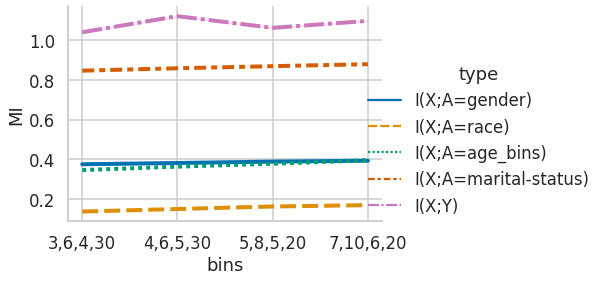

In [13]:

subset_a = subset[['type','I(X,A)','bins']].rename(columns={'I(X,A)':'MI'})
subset_y = subset[['I(X,Y)','bins']].rename(columns={'I(X,Y)':'MI'})
subset_y['type'] = 'I(X;Y)'
subset_plt = pd.concat([subset_a,subset_y]).reset_index()
subset_plt
plot = sns.relplot(data = subset_plt,x='bins',y='MI',hue='type',kind='line',style='type',aspect=1.3,linewidth=4)
#subset_plt.axis('scaling')
#plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
#for ax in plot.axes.flat:
    #for label in ax.get_xticklabels():
        #label.set_rotation(90)
plot.fig.set_size_inches(9,4)
